# 有一个单细胞生物，生活在糖水和盐水混合物中，糖水盐水在不停的流动，它有两个鞭毛，分别可以感知糖水和盐水，当总浓度到达一定值时，就会吃这些糖水盐水



![](神经元.png)  ![](ANN.jpg)


# 但是，同时吃进糖水和盐水，会造成细胞结石，有损细胞健康


# 慢慢地，单细胞生物慢慢和其它细胞一起，组成了多细胞生物，进化出了一个能力，有糖水吃糖水，有盐水吃盐水，同时都有的话就不吃，防止细胞里面无法同时消化两种物体。

![](多神经元.png)
![](ANNNetwork.jpg)

# 下面，我们用人工神经元网络来模拟从单细胞到多细胞的进化过程
# 首先，画出最终的输入输出函数3维曲线。

画出它的输入输出函数3D图
提示：Z=numpy.logical.xor(X,Y)

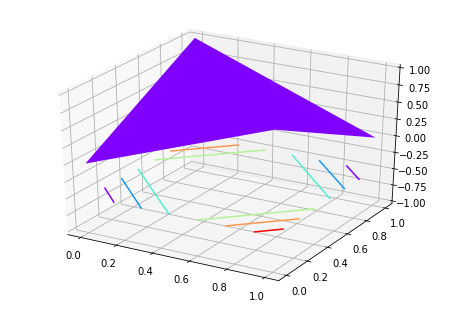

[[0 1]
 [0 1]]
[[0 0]
 [1 1]]
[[False  True]
 [ True False]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x1=np.arange(0,2,1)
x2=np.arange(0,2,1)

X,Y=np.meshgrid(x1, x2)    # x-y 平面的网格
Z=np.logical_xor(X,Y)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.contour(X, Y, Z, offset = -0.5, cmap = 'rainbow')
ax.set_zlim(-1, 1)

plt.show()

print(X)
print(Y)
print(Z)



# 所以，人工神经元有网络有2输入，1输出
                                            输入层            中间层          输出层
                                                      L1                L2 



![](xorann.png)

# 问题是中间层选几个？

# 理想中的输出层是这样的

![](BPB01.png)

# 定义NN输入输出函数

In [4]:
import numpy as np

def NNWxor(x1,x2):
    X=x1,x2    
    
    print("x1")
    print(x1)
    print("x2")
    print(x2)
    
    
    wb1=10
    wb2=0.2
    wb3=-1
    wb4=-20
    
    w11=-10
    w12=-20
    w13=20
    w14=20

    w21=-10
    w22=20
    w23=-20
    w24=20
    
    l2w1=-9
    l2w2=10
    l2w3=10
    l2w4=-9
    
    s1=np.add(w11*x1,w21*x2)
    s1=np.add(wb1,s1)
    
    s2=np.add(w12*x1,w22*x2)
    s2=np.add(wb2,s2)
    
    s3=np.add(w13*x1,w23*x2)
    s3=np.add(wb3,s3)
    
    s4=np.add(w14*x1,w24*x2)
    s4=np.add(wb4,s4)
        
    print("s1 s2 s3 s4")
    print(s1)
    print(s2)
    print(s3)
    print(s4)
        
    ol1=1/(1+np.exp(-1*s1))
    ol2=1/(1+np.exp(-1*s2))
    ol3=1/(1+np.exp(-1*s3))
    ol4=1/(1+np.exp(-1*s4))
   
    print("ol1 ol2 ol3 ol4")
    print(ol1)
    print(ol2)
    print(ol3)
    print(ol4)

    Ost1=np.add(l2w1*ol1,l2w2*ol2)
    Ost2=np.add(l2w3*ol3,l2w4*ol4)
           
    OS=np.add(Ost1,Ost2)
    
    print("OS")
    print(OS)
    
        
    R=1/(1+np.exp(-OS))
    
    print("R")
    print(R)
    
    return R
         

    

# 画出NNWadd的三维图

x1
[[0 1]
 [0 1]]
x2
[[0 0]
 [1 1]]
s1 s2 s3 s4
[[ 10   0]
 [  0 -10]]
[[  0.2 -19.8]
 [ 20.2   0.2]]
[[ -1  19]
 [-21  -1]]
[[-20   0]
 [  0  20]]
ol1 ol2 ol3 ol4
[[  9.99954602e-01   5.00000000e-01]
 [  5.00000000e-01   4.53978687e-05]]
[[  5.49833997e-01   2.51749871e-09]
 [  9.99999998e-01   5.49833997e-01]]
[[  2.68941421e-01   9.99999994e-01]
 [  7.58256042e-10   2.68941421e-01]]
[[  2.06115362e-09   5.00000000e-01]
 [  5.00000000e-01   9.99999998e-01]]
OS
[[-0.81183725  0.99999997]
 [ 0.99999999 -0.81265438]]
R
[[ 0.30749913  0.73105857]
 [ 0.73105858  0.30732515]]


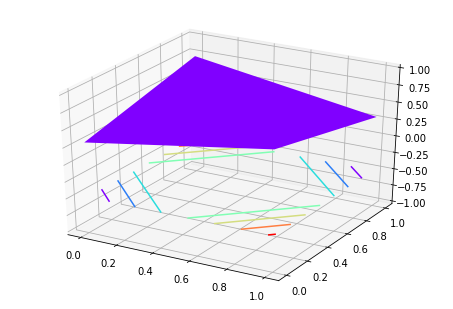

[[ 0.30749913  0.73105857]
 [ 0.73105858  0.30732515]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x1=np.arange(0,2,1)
x2=np.arange(0,2,1)

X,Y=np.meshgrid(x1, x2)    # x-y 平面的网格
     
Z=NNWxor(X,Y)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.contour(X, Y, Z, offset = -0.5, cmap = 'rainbow')
ax.set_zlim(-1, 1)

plt.show()

print(Z)

# 在表格中试算 到达TS1 TS2 TS3 TS4 的目标
注意只修改数据第一行WB1~W21即黑框里面的值，其它值会自动跟随变化

![](weights_worksheet.png)

# 由于第一行x1,x2值为0，想让S1为1是不可能的。因此需要加一个偏移量。B


![](BPBX1X2.png)

# 令B=1，继续试算 到达TS1 TS2 TS3 TS4 的目标
注意只修改数据第一行WB1~W21即黑框里面的值，其它值会自动跟随变化
![](B1S1R.png)

# 练习：1 继续完成试算表格

In [41]:
print(1/(1+np.exp(-10)))

0.999954602131


# 练习： 2 调整权值，尽可能接近目标函数